# CS579: Lecture 09  

**Cascades II**

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

With some figures from [Networks and Markets: Reasoning about a highly connected world](http://www.cs.cornell.edu/home/kleinber/networks-book/), David Easley and Jon Kleinberg

# Game-theoretic Diffusion Model

Consider the following scenario:
- Each node must choose between two possible behaviors $A$ and $B$
  - E.g., $A$= buy an iPhone; $B$= buy a Samsung
- If nodes $v$ and $w$ are linked by an edge, they are incentivized to have same behavior
- Payoff matrix:

<table>
<tr><td></td><td colspan=3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w$</td></tr>
<tr><td rowspan=3>$v$</td><td></td><td>$A$</td><td>$B$</td></tr>
<tr><td>$A$</td><td>a,a </td><td>0,0</td></tr>
<tr><td>$B$</td><td>0,0 </td><td>b,b</td></tr>
</table>

- Both do $A$: both get reward $a$.
- Both do $B$: both get reward $b$.
- Do opposite: both get reward $0$.
    
**Each node plays this game with all neighbors.**

- Payoff for a node is sum over all neighbors.

Suppose some of $v$'s neighbors choose $A$ and some choose $B$  
**Which should $v$ choose?**

Suppose some of $v$'s neighbors choose $A$ and some choose $B$  
**Which should $v$ choose?**

- Suppose fraction $p$ of $v$'s neighbors choose $A$; $1-p$ choose $B$.
- Let $d$ be the number of neighbors of $v$.
- Then, $pd$ choose $A$ and $(1-p)d$ choose $B$
- If $v$ chooses $A$, payoff=?
- If $v$ chooses $B$, payoff=?

Suppose some of $v$'s neighbors choose $A$ and some choose $B$  
**Which should $v$ choose?**

- Suppose fraction $p$ of $v$'s neighbors choose $A$; $1-p$ choose $B$.
- Let $d$ be the number of neighbors of $v$.
- Then, $pd$ choose $A$ and $(1-p)d$ choose $B$
- If $v$ chooses $A$, payoff=$pda$
- If $v$ chooses $B$, payoff=$(1-p)db$
- $A$ should be chosen iff

$$
pda \ge (1-p)db
$$

equivalently

$$
p \ge \frac{b}{a+b}
$$

Suppose some of $v$'s neighbors choose $A$ and some choose $B$  
**Which should $v$ choose?**

- Suppose fraction $p$ of $v$'s neighbors choose $A$; $1-p$ choose $B$.
- Let $d$ be the number of neighbors of $v$.
- Then, $pd$ choose $A$ and $(1-p)d$ choose $B$
- If $v$ chooses $A$, payoff=$pda$
- If $v$ chooses $B$, payoff=$(1-p)db$
- $A$ should be chosen iff

$$
pda \ge (1-p)db
$$

equivalently

$$
p \ge \frac{b}{a+b}
$$

Let $q=\frac{b}{a+b}$

- Small $q \rightarrow$ $A$ much more appealing; only need a few neighbors choosing $A$ to choose $A$.
- Large $q \rightarrow$ $B$ much more appealing; need many neighbors choosing $A$ to choose $A$.
- We'll arbitrarily break ties by choosing $A$.

# What are states of equilibria?

# What are states of equilibria?
- All adopt $A$
- All adopt $B$
- Some adopt $A$ and some adopt $B$

# Simulation

- Assume all nodes select $B$ at time $0$
- Select some nodes to adopt $A$ ("initial adopters")
- What is resulting equilibria?
  - All adopt $A$?
  - Some adopt $A$?
  - (Cannot switch back from $A$ to $B$. Why?)

In [1]:
import networkx as nx
graph = nx.Graph()
graph.add_edges_from([('v', 'w'), ('v', 'r'), ('v', 't'),
                      ('w', 'r'), ('w', 's'), ('w', 'u'),
                      ('w', 't'), ('r', 's'), ('t', 'u'), ('s', 'u')])
# Initialize every node to choice 'B'
nx.set_node_attributes(graph, 'choice', 'B')

In [14]:
graph.node

{'r': {'choice': 'B'},
 's': {'choice': 'B'},
 't': {'choice': 'B'},
 'u': {'choice': 'B'},
 'v': {'choice': 'A'},
 'w': {'choice': 'A'}}

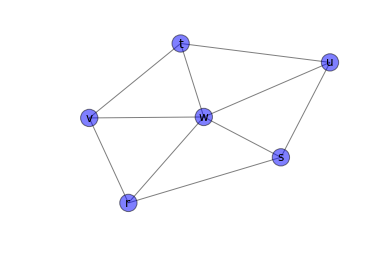

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

layout = nx.spring_layout(graph)
def draw_graph(graph):
    plt.figure()
    nodes = graph.nodes()
    colors = ['r' if graph.node[n]['choice'] == 'A' else 'b'
              for n in graph]
    plt.axis('off')
    nx.draw_networkx(graph, nodelist=nodes, with_labels=True,
                     width=1, node_color=colors,alpha=.5,
                     pos=layout)    
draw_graph(graph)

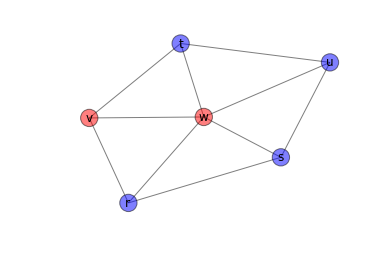

In [5]:
# Make v, w "early adopters"
graph.node['w']['choice'] = 'A'
graph.node['v']['choice'] = 'A'
draw_graph(graph)

In [15]:
def simulate(graph, a, b, verbose=False):
    """ For each node, set new choice based on payoffs a/b and
    choices of neighbors. """
    for v in graph:
        a_neighbors = [w for w in graph.neighbors(v)
                       if graph.node[w]['choice'] == 'A']
        b_neighbors = [w  for w in graph.neighbors(v)
                       if graph.node[w]['choice'] == 'B']
        p = 1. * len(a_neighbors) / (len(a_neighbors) + len(b_neighbors))
        q = 1. * b / (a + b)
        if verbose:
            print 'node %s p=%.3f q=%.3f' % (v, p, q)
        if p >= q:
            graph.node[v]['choice'] = 'A'
        else:
            graph.node[v]['choice'] = 'B'

node s p=0.333 q=0.400
node r p=0.667 q=0.400
node u p=0.333 q=0.400
node t p=0.667 q=0.400
node w p=0.600 q=0.400
node v p=1.000 q=0.400


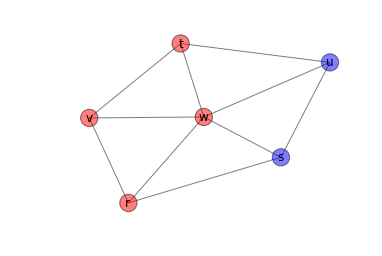

In [16]:
# Make first step of simulation.
simulate(graph, 3, 2, verbose=True)
draw_graph(graph)

node s p=0.667 q=0.400
node r p=1.000 q=0.400
node u p=1.000 q=0.400
node t p=1.000 q=0.400
node w p=1.000 q=0.400
node v p=1.000 q=0.400


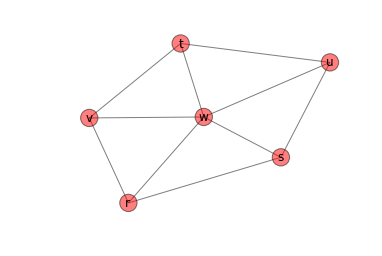

In [17]:
# Make second step of simulation.
simulate(graph, 3, 2, verbose=True)
draw_graph(graph)

So, all adopt $A$ after 2 steps.

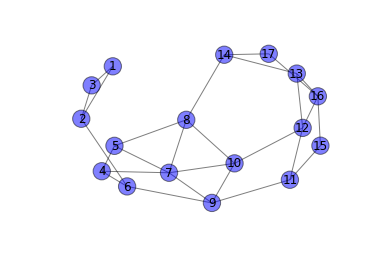

In [21]:
# Consider a larger network. (Fig 19.4 in book)
def create_large_graph():
    graph = nx.Graph()
    graph.add_edges_from([(1,2), (1,3), (2,3), (2,6),
                          (6,4), (6,9), (4,7), (4,5),
                          (9,7), (5,7), (9,11), (5,8),
                          (7,8), (7,10), (9,10), (8,10),
                          (11,12), (11,15), (10,12), (8,14),
                          (15,16), (12,16), (14,13), (12,13),
                          (14,17), (13,16), (15,16), (17,16)])
    nx.set_node_attributes(graph, 'choice', 'B')
    return graph

graph = create_large_graph()
# Initialize every node to choice 'B'
layout = nx.spring_layout(graph)
draw_graph(graph)

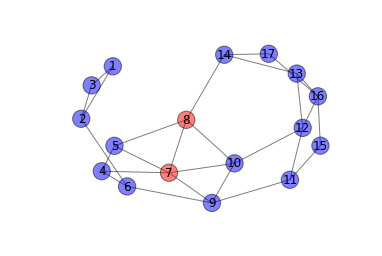

In [22]:
# Make 7, 8 "early adopters"
graph.node[7]['choice'] = 'A'
graph.node[8]['choice'] = 'A'
draw_graph(graph)

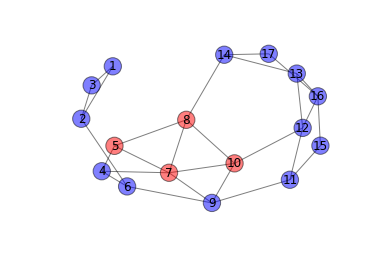

In [23]:
# Simulation, step 1
simulate(graph, 3, 2)
draw_graph(graph)

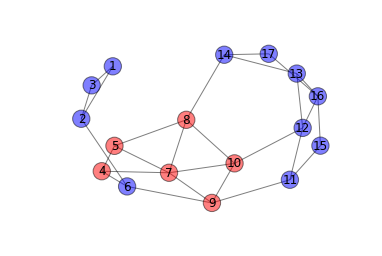

In [24]:
# Simulation, step 2
simulate(graph, 3, 2)
draw_graph(graph)

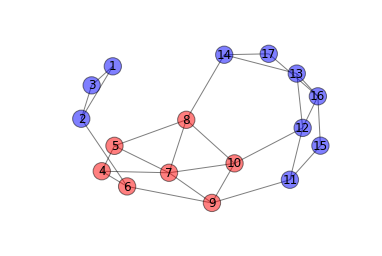

In [25]:
# Simulation, step 3
simulate(graph, 3, 2)
draw_graph(graph)
# No changes after 3 steps.

**Cascade:** a sequence of adoptions of a behavior

Two possible outcomes of a cascade:

1. **incomplete cascade:** converges to partial adoption
2. **complete cascade:** converges to total adoption

The choice of initial adopters can *cause* a complete cascade or an incomplete cascade.

# How can we increase likelihood of a cascade?

<br><br><br><br>

# How can we increase likelihood of a cascade?

1. Increase payoff $a$ (e.g., make a better product)
2. Better selection of initial adopters (e.g., market to certain people more)

<br><br><br>

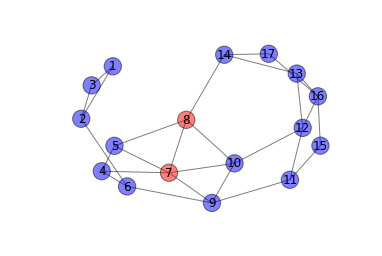

In [26]:
# Let's increase payoff a from 3->4

graph = create_large_graph()
# Make 7, 8 "early adopters"
graph.node[7]['choice'] = 'A'
graph.node[8]['choice'] = 'A'
draw_graph(graph)

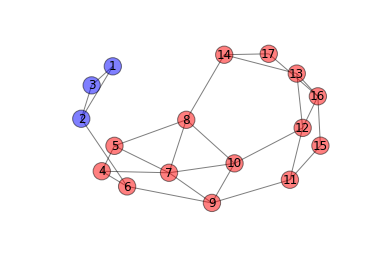

In [27]:
# Simulation, step 1
simulate(graph, 4, 2)
draw_graph(graph)

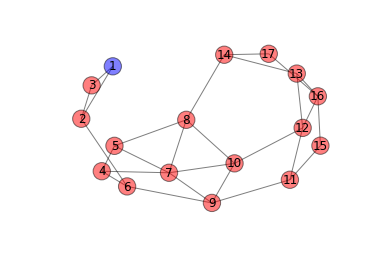

In [28]:
# Simulation, step 2
simulate(graph, 4, 2)
draw_graph(graph)

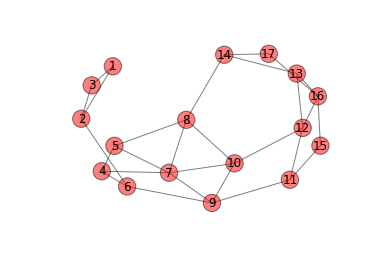

In [29]:
# Simulation, step 3
simulate(graph, 4, 2)
draw_graph(graph)
# All adopt A after 3 steps.

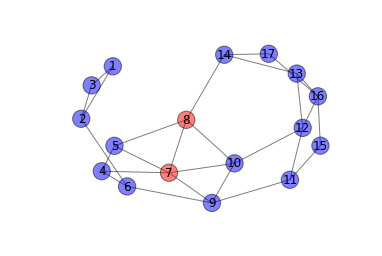

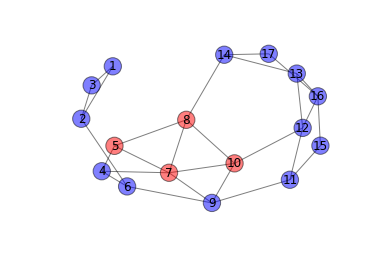

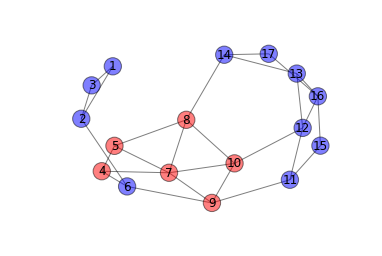

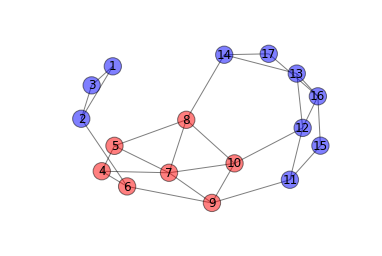

In [30]:
# Next, let's go back to 3/2 payoffs,
# but convince 12 to adopt.
graph = create_large_graph()
# Make 7, 8 "early adopters"
graph.node[7]['choice'] = 'A'
graph.node[8]['choice'] = 'A'
draw_graph(graph)
simulate(graph, 3, 2)
draw_graph(graph)
simulate(graph, 3, 2)
draw_graph(graph)
simulate(graph, 3, 2)
draw_graph(graph)

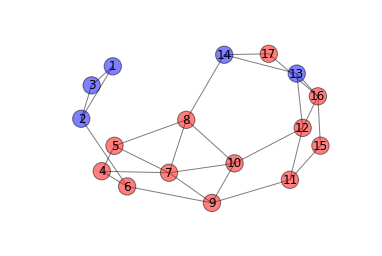

In [31]:
# Convince 12 to adopt 'A'
graph.node[12]['choice'] = 'A'
simulate(graph, 3, 2)
draw_graph(graph)

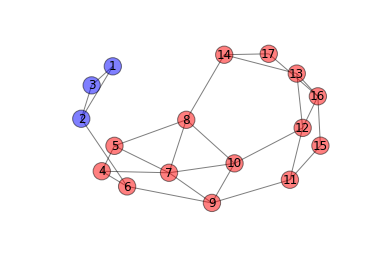

In [32]:
# Cascade continues...
simulate(graph, 3, 2)
draw_graph(graph)

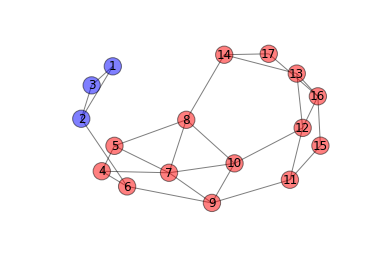

In [33]:
# Cascade stops.
simulate(graph, 3, 2)
draw_graph(graph)

** What prevents cascade from affecting nodes 1,2,3?**

# Cascades and Clusters

   A cluster of density $p$ is a set of nodes such that each node has at least a $p$ fraction of its neighbors in the set.
   
![density](density.png)

What cluster has density 1?

**Conjectures:**  
(i) A cascade halts at dense clusters;   
(ii) This is the only thing that halts a cascade.

More formally:

Consider a set of initial adopters of behavior $A$, with a threshold of $q$ for nodes in the remaining network to adopt behavior $A$.

(i) If the remaining network contains a cluster of density greater than $(1 − q)$, then the set of initial adopters will not cause a complete cascade.

(ii) Moreover, whenever a set of initial adopters does not cause a complete cascade with threshold $q$, the remaining network must contain a cluster of density greater than $(1 − q)$.

**Proof of Claim 1:** *A cascade halts at dense clusters*

![cluster](cluster.png)

By contradiction:
- Assume node $v$ is in a cluster with density greater than $1-q$
- Assume that $v$ is the first to adopt $A$ in that cluster (contradiction)
- For this to happen, fraction $q$ of $v$'s neighbors must have adopted $A$
- Since $v$ is first to adopt in this cluster, all neighbors that adopted $A$ must be *outside* of cluster.
- But, by definition, more than $1-q$ neighbors are in cluster, thus less than $q$ neighbors are outside of cluster.  
**contradition** $\Box$

**Proof of Claim 2:** *Dense clusters are the only things that halt cascades.*

![obstacles](obstacles.png)

- Show that whenever a cascade halts, there exists a cluster with density greater than $(1-q)$.
- Let $S$ be the set of nodes that have not yet adopted $A$
- Show that $S$ has density greater than $1-q$.
- Consider any $w \in S$
  - Since $w$ has not adopted $A$, the fraction of its neighbors adopting $A$ is less than $q$ (by definition)
  - Hence, fraction of its neighbors adopting $B$ is greater than $1-q$.
  - Since $S$ contains all nodes adopting $B$, the fraction of $w$'s neighbors in $S$ is greater than $1-q$.
  - Since this is true for all $w \in S$, $S$ is a cluster with density greater than $(1-q)$. $\Box$

>**A set of initial adopters can cause a complete cascade at threshold $q$ if and only if the remaining network contains no cluster of density greater than $(1 − q)$.**

## Weak ties and diffusion

![weak](weak.png)

Will $u$ or $v$ adopt from $w,x$?

>**"Although a world-spanning system of weak ties in the global friendship network is able to spread awareness of a joke or an on-line video with remarkable speed, political mobilization moves more sluggishly, needing to gain momentum within neighborhoods and small communities."**

# Extension 1: Each node has a different payoff

<table>
<tr><td></td><td colspan=3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w$</td></tr>
<tr><td rowspan=3>$v$</td><td></td><td>$A$</td><td>$B$</td></tr>
<tr><td>$A$</td><td>$a_v$,$a_w$ </td><td>0,0</td></tr>
<tr><td>$B$</td><td>0,0 </td><td>$b_v$,$b_w$</td></tr>
</table>

- If $v$ chooses $A$, payoff=$pda_v$
- If $v$ chooses $B$, payoff=$(1-p)db_v$
- $A$ should be chosen iff

$$
pda_v \ge (1-p)db_v
$$

equivalently

$$
p \ge \frac{b_v}{a_v+b_v}
$$

Let $$q_v = \frac{b_v}{a_v+b_v}$$

$q_v$ is a **personal threshold**. $v$ chooses $A$ iff a $q_v$ fraction of neighbors do.

**How does diversity of $q_v$ affect cascade?**

![personal](personal.png)

**Influenceable people?** (**susceptibility**)

# Extension 2: Add edge weights

- Edge $e_{u,v} \in [0,1]$ specify the **influence** $u$ has on $v$

- Let $A_v$ be the neighbors of $v$ that adopt $A$

- $v$ adopts $A$ if:

$$\sum_{u \in A_v} e_{u,v} \ge q_v$$

**Linear Threshold Model** (See [Watts 2002](http://research.microsoft.com/apps/pubs/default.aspx?id=164520))
